In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# Data loading from csv
df = pd.read_csv('/content/drive/MyDrive/Major Project(Smartknower)/Dataset.csv')
df.shape


(499, 2)

In [3]:
df

,id,Tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...
...,...,...
494,8415,Thinking of an iphone5? think again. The only ...
495,8416,#IPHONE CASES COMING SOON! CHECK WEBSITE #cute...
496,8417,This feeling when you lose your appstore appro...
497,8418,We would like to wish you an amazing day! Make...


In [4]:
df.head()

,id,Tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


In [5]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df['score2'] = df['Tweet'].apply(lambda review: sid.polarity_scores(review))

df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


,id,Tweet,score2
0,7921,I hate the new #iphone upgrade. Won't let me d...,"{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compou..."
1,7922,currently shitting my fucking pants. #apple #i...,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp..."
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...","{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp..."
3,7924,My ipod is officially dead. I lost all my pict...,"{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'comp..."
4,7925,Been fighting iTunes all night! I only want th...,"{'neg': 0.198, 'neu': 0.71, 'pos': 0.092, 'com..."


In [6]:
df['compound']  = df['score2'].apply(lambda score_dict: score_dict['compound'])

df.head()

,id,Tweet,score2,compound
0,7921,I hate the new #iphone upgrade. Won't let me d...,"{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compou...",-0.7351
1,7922,currently shitting my fucking pants. #apple #i...,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",-0.4215
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...","{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...",0.7243
3,7924,My ipod is officially dead. I lost all my pict...,"{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'comp...",-0.7650
4,7925,Been fighting iTunes all night! I only want th...,"{'neg': 0.198, 'neu': 0.71, 'pos': 0.092, 'com...",-0.3595


In [7]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

,id,Tweet,score2,compound,comp_score
0,7921,I hate the new #iphone upgrade. Won't let me d...,"{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compou...",-0.7351,neg
1,7922,currently shitting my fucking pants. #apple #i...,"{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...",-0.4215,neg
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...","{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...",0.7243,pos
3,7924,My ipod is officially dead. I lost all my pict...,"{'neg': 0.248, 'neu': 0.752, 'pos': 0.0, 'comp...",-0.7650,neg
4,7925,Been fighting iTunes all night! I only want th...,"{'neg': 0.198, 'neu': 0.71, 'pos': 0.092, 'com...",-0.3595,neg


In [8]:
df = df.sort_values(by ='compound' )
print("Contents of Sorted Dataframe based on a single column 'compound' : ")
df

Contents of Sorted Dataframe based on a single column 'compound' : 


,id,Tweet,score2,compound,comp_score
366,8287,(YouTube) The Murder of Antoinette Chase – Mur...,"{'neg': 0.432, 'neu': 0.568, 'pos': 0.0, 'comp...",-0.9403,neg
486,8407,Dear #iphone5 FUCK YOU!! YOURE MAKING MY 4 CRA...,"{'neg': 0.411, 'neu': 0.511, 'pos': 0.078, 'co...",-0.9197,neg
28,7949,My iPhone 5 charger has broken. I bought two n...,"{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'comp...",-0.9186,neg
100,8021,#Apple is trying to ban all #HTC phones from t...,"{'neg': 0.382, 'neu': 0.618, 'pos': 0.0, 'comp...",-0.8948,neg
145,8066,“@WeeShanksy: Stupid shitty hateful phone has ...,"{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'comp...",-0.8807,neg
...,...,...,...,...,...
194,8115,Woo hoo! Happy girl! Thank u Samsung! #samsung...,"{'neg': 0.0, 'neu': 0.469, 'pos': 0.531, 'comp...",0.8800,pos
241,8162,Yey! Thank you papa. ^_^ I already love this p...,"{'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'comp...",0.8829,pos
378,8299,Best ( IPTV ) Servers for 2018 Download it now...,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou...",0.8934,pos
458,8379,Wow what a great day. #iphonex arrived and it’...,"{'neg': 0.0, 'neu': 0.456, 'pos': 0.544, 'comp...",0.9477,pos


In [9]:
df.describe()



,id,compound
count,499.000000,499.000000
mean,8170.000000,0.146650
std,144.193157,0.432215
min,7921.000000,-0.940300
25%,8045.500000,0.000000
50%,8170.000000,0.000000
75%,8294.500000,0.509950
max,8419.000000,0.952600


In [10]:
df.groupby('comp_score').describe()

id                           ... compound                  
            count         mean         std  ...      50%       75%     max
comp_score                                  ...                           
neg          99.0  8160.939394  151.116648  ... -0.47410 -0.285750 -0.0387
pos         400.0  8172.242500  142.534870  ...  0.20495  0.611425  0.9526

[2 rows x 16 columns]

In [11]:
df['length'] = df['Tweet'].apply(len)
df.head()

,id,Tweet,score2,compound,comp_score,length
366,8287,(YouTube) The Murder of Antoinette Chase – Mur...,"{'neg': 0.432, 'neu': 0.568, 'pos': 0.0, 'comp...",-0.9403,neg,316
486,8407,Dear #iphone5 FUCK YOU!! YOURE MAKING MY 4 CRA...,"{'neg': 0.411, 'neu': 0.511, 'pos': 0.078, 'co...",-0.9197,neg,122
28,7949,My iPhone 5 charger has broken. I bought two n...,"{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'comp...",-0.9186,neg,103
100,8021,#Apple is trying to ban all #HTC phones from t...,"{'neg': 0.382, 'neu': 0.618, 'pos': 0.0, 'comp...",-0.8948,neg,120
145,8066,“@WeeShanksy: Stupid shitty hateful phone has ...,"{'neg': 0.481, 'neu': 0.519, 'pos': 0.0, 'comp...",-0.8807,neg,116


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

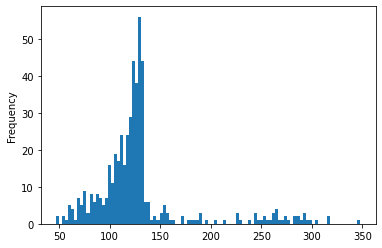

In [13]:
df['length'].plot(bins=100, kind='hist') 

In [14]:
df.length.describe()

count    499.000000
mean     129.292585
std       47.834581
min       47.000000
25%      107.000000
50%      123.000000
75%      131.500000
max      348.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f94516b0490>,
      dtype=object)

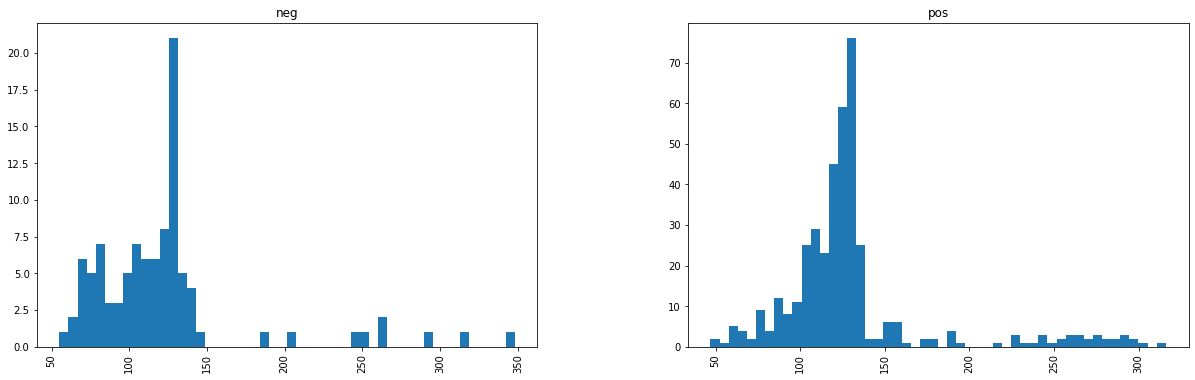

In [15]:
df.hist(column='length', by='comp_score', bins=50,figsize=(20,6))

In [16]:
#Testing compound score for a brand new text



In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
text_msg=input("Enter your text to analyze the sentiment")
print(text_msg)
# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
scores = sid.polarity_scores(text_msg)

# Here we loop through the keys contained in scores (pos, neu, neg, and compound scores) and print the key-value pairs on the screen

for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

Enter your text to analyze the sentimentfuck
fuck
compound: -0.5423, neg: 1.0, neu: 0.0, pos: 0.0, 

In [18]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 6.5MB/s 
     |████████████████████████████████| 174kB 46.3MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 
     |████████████████████████████████| 4.2MB 44.5MB/s 
     |████████████████████████████████| 81kB 11.9MB/s 
     |████████████████████████████████| 112kB 38.8MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 122kB 62.0MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [22]:
%%writefile app.py

import streamlit as st
import numpy as np
st.title('Sentiment Analysis')
st.text_input("Enter the Text for which you want to analyze the sentiment")
st.write(st.text_input)
st.write('Result...')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
scores = sid.polarity_scores(st.text_input)
for key in sorted(scores):
  st.write('{0}: {1}, '.format(key, scores[key]), end='')
else:
  st.write("Please enter some text")
  


Overwriting app.py


In [20]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://fbbba021be49.ngrok.io'